https://public.tableau.com/profile/rohit.saha2913#!/vizhome/shared/4CS38CSPJ

# Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tqdm import tqdm

# Data

In [4]:
data = pd.read_csv('../data/Test.csv')

In [5]:
data

,Match,Date,Versus,Ground,Inns,How Dismissed,Runs,B/F,S/R,Aggr,Avg,S/R.1
0,1,20-06-1996,England,Lord's,1st,c †R C Russell b C C Lewis,95,267,35.58,95,95.00,35.58
1,,,,,2nd,did not bat,-,-,-,95,95.00,35.58
2,2,04-07-1996,England,Trent Bridge,1st,c †R C Russell b M A Ealham,84,149,56.38,179,89.50,43.03
3,,,,,2nd,c G P Thorpe b A D Mullally,8,21,38.1,187,62.33,42.79
4,3,10-10-1996,Australia,Feroz Shah Kotla,1st,c †I A Healy b S R Waugh,40,64,62.5,227,56.75,45.31
5,,,,,2nd,did not bat,-,-,-,227,56.75,45.31
6,4,20-11-1996,South Africa,Sardar Patel Stadium,1st,lbw b P L Symcox,24,98,24.49,251,50.20,41.90
7,,,,,2nd,lbw b P L Symcox,34,110,30.91,285,47.50,40.20
8,5,27-11-1996,South Africa,Eden Gardens,1st,c A C Hudson b B M McMillan,31,48,64.58,316,45.14,41.74
9,,,,,2nd,b B M McMillan,23,127,18.11,339,42.38,38.35


**HIGHER LEVEL SUMMARY**

In [6]:
def runs_balls_clean(x):
    if x.endswith('*'):
        return int(x[:-1])
    if x == '-':
        return 0
    else:
        return int(x)

In [7]:
pd.DataFrame({
    'Matches': [len(data)],
    'Innings': [len(data)-data['How Dismissed'].value_counts()['did not bat']],
    'Not Outs': [data['How Dismissed'].value_counts()['not out']],
    'Aggregate': [data['Aggr'][len(data)-1]],
    'Highest Score': [data['Runs'].apply(runs_balls_clean).max()],
    'Average': [data['Avg'][len(data)-1]],
    '50s': [len(data[(data['Runs'].apply(runs_balls_clean) >=50) & (data['Runs'].apply(runs_balls_clean) < 100)])],
    '100s': [len(data[data['Runs'].apply(runs_balls_clean) >= 100])],
    'Ducks': [len(data[data['Runs'] == '0'])],
    'Scoring Rate': [data['S/R.1'][len(data)-1]],
    '4s': [950],
    '6s': [42]
}).to_json('../data/ODI-Highlights.json')

**PERFORMANCE AGAINST TEAMS**

In [8]:
def out(x):
    return 0 if x in ['not out', 'did not bat'] else 1

In [9]:
_ = pd.DataFrame()
for c in data['Versus'].unique():
    print(c)
    d_ = data[data['Versus'] == c].reset_index(drop=True)
    d_['B/F.1'] = 0
    d_['B/F.1'][0] = runs_balls_clean(d_['B/F'][0])
    d_['Out Count'] = 0
    d_['Out Count'][0] = out(d_['How Dismissed'][0])
    d_['Aggr'][0] = runs_balls_clean(d_['Runs'][0])
    d_['Avg'][0] = round(d_['Aggr'][0]/d_['Out Count'][0], 2)
    for i in range(1, len(d_)):
        d_['Aggr'][i] = d_['Aggr'][i-1]+runs_balls_clean(d_['Runs'][i])
        d_['B/F.1'][i] = d_['B/F.1'][i-1]+runs_balls_clean(d_['B/F'][i])
        d_['S/R.1'][i] = round(d_['Aggr'][i]/d_['B/F.1'][i]*100, 2)
        d_['Out Count'][i] = d_['Out Count'][i-1]+out(d_['How Dismissed'][i])
        d_['Avg'][i] = round(d_['Aggr'][i]/d_['Out Count'][i], 2)
    d_.to_csv(f'../data/ODI-{c}.csv')
    try:
        inns = len(d_)-d_['How Dismissed'].value_counts()['did not bat']
    except:
        inns = len(d_)
    try:
        no = d_['How Dismissed'].value_counts()['not out']
    except:
        no = 0
    df_ = pd.DataFrame({
        'Country': [c],
        'Matches': [len(d_)],
        'Innings': [inns],
        'Not Outs': [no],
        'Aggregate': [round(d_['Aggr'][len(d_)-1], 2)],
        'Highest Score': [d_['Runs'].apply(runs_balls_clean).max()],
        'Average': [round(d_['Avg'][len(d_)-1], 2)],
        '50s': [len(d_[(d_['Runs'].apply(runs_balls_clean) >=50) & (d_['Runs'].apply(runs_balls_clean) < 100)])],
        '100s': [len(d_[d_['Runs'].apply(runs_balls_clean) >= 100])],
        'Ducks': [len(d_[d_['Runs'] == '0'])],
        'Scoring Rate': [d_['S/R.1'][len(d_)-1]],
    })
    _ = pd.concat([_, df_])
    df_.to_json(f'../data/ODI-{c}-Highlights.json')

England
 
Australia
South Africa
West Indies
Sri Lanka
Zimbabwe
New Zealand
Pakistan
Bangladesh


In [10]:
_ = _.sort_values('Matches', ascending=False)
_ = _.reset_index(drop=True)

In [11]:
_

,Country,Matches,Innings,Not Outs,Aggregate,Highest Score,Average,50s,100s,Ducks,Scoring Rate
0,,156,122,21,4183,180,41.42,24,6,3,40.07
1,Australia,33,33,1,1219,233,38.09,8,1,3,40.53
2,West Indies,23,23,2,1359,146,64.71,8,4,0,40.85
3,England,21,21,2,1507,217,79.32,6,6,0,42.38
4,South Africa,21,21,0,655,148,31.19,2,2,0,33.75
5,Sri Lanka,20,20,0,981,177,49.05,4,3,0,48.04
6,New Zealand,15,15,0,1116,222,74.40,3,4,1,45.02
7,Pakistan,15,15,1,942,270,67.29,3,4,0,48.06
8,Zimbabwe,9,9,2,833,200,119.00,4,3,0,49.76
9,Bangladesh,7,7,0,493,160,70.43,1,3,1,59.25


In [12]:
_.to_csv('../data/ODI-Countrywise-Summary.csv', index=False)

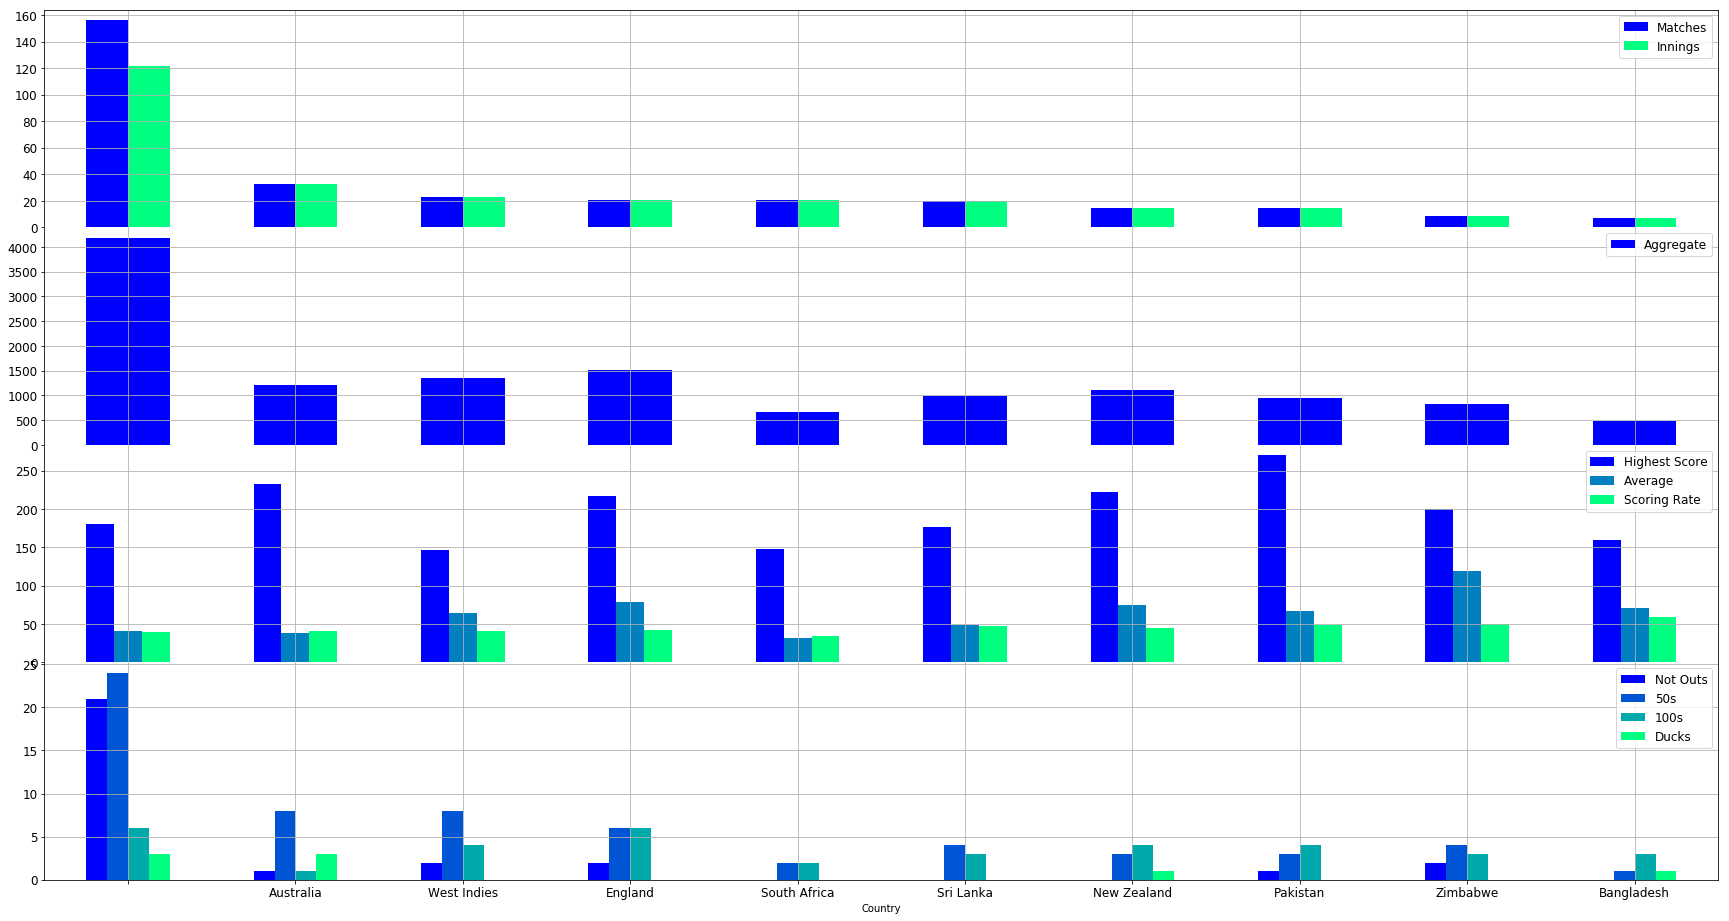

In [13]:
fig, ax = plt.subplots(figsize=(30, 16), nrows=4, ncols=1, frameon=False)
fig.subplots_adjust(hspace=0)
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[3].spines['top'].set_visible(False)

_[['Country', 'Matches', 'Innings']].plot.bar(x='Country', ax=ax[0], grid=True, fontsize=12, cmap='winter')
_[['Country', 'Aggregate']].plot.bar(x='Country', ax=ax[1], sharex=ax[0], grid=True, fontsize=12, cmap='winter')
_[['Country', 'Highest Score', 'Average', 'Scoring Rate']].plot.bar(x='Country', ax=ax[2], sharex=ax[0], grid=True, fontsize=12, cmap='winter')
_[['Country', 'Not Outs', '50s', '100s', 'Ducks']].plot.bar(x='Country', ax=ax[3], sharex=ax[0], grid=True, fontsize=12, cmap='winter')

for i in range(4):
    ax[i].legend(loc=1, prop={'size': 12})

plt.xticks(rotation=0)
plt.savefig('../data/ODI-CountryWise.png')

**YEARLY PERFORMANCE**

In [14]:
_ = pd.DataFrame()
for y in range(1996, 2012):
    print(y)
    try:
        d_ = data[data['Date'].apply(lambda x: int(x[6:])) == y].reset_index(drop=True)
        d_['B/F.1'] = 0
        d_['B/F.1'][0] = runs_balls_clean(d_['B/F'][0])
        d_['Out Count'] = 0
        d_['Out Count'][0] = out(d_['How Dismissed'][0])
        d_['Aggr'][0] = runs_balls_clean(d_['Runs'][0])
        d_['Avg'][0] = round(d_['Aggr'][0]/d_['Out Count'][0], 2)
        for i in range(1, len(d_)):
            d_['Aggr'][i] = d_['Aggr'][i-1]+runs_balls_clean(d_['Runs'][i])
            d_['B/F.1'][i] = d_['B/F.1'][i-1]+runs_balls_clean(d_['B/F'][i])
            d_['S/R.1'][i] = round(d_['Aggr'][i]/d_['B/F.1'][i]*100, 2)
            d_['Out Count'][i] = d_['Out Count'][i-1]+out(d_['How Dismissed'][i])
            d_['Avg'][i] = round(d_['Aggr'][i]/d_['Out Count'][i], 2)
        d_.to_csv(f'../data/ODI-{y}.csv')
        try:
            inns = len(d_)-d_['How Dismissed'].value_counts()['did not bat']
        except:
            inns = len(d_)
        try:
            no = d_['How Dismissed'].value_counts()['not out']
        except:
            no = 0
        df_ = pd.DataFrame({
            'Year': [y],
            'Matches': [len(d_)],
            'Innings': [inns],
            'Not Outs': [no],
            'Aggregate': [d_['Aggr'][len(d_)-1]],
            'Highest Score': [d_['Runs'].apply(runs_balls_clean).max()],
            'Average': [d_['Avg'][len(d_)-1]],
            '50s': [len(d_[(d_['Runs'].apply(runs_balls_clean) >=50) & (d_['Runs'].apply(runs_balls_clean) < 100)])],
            '100s': [len(d_[d_['Runs'].apply(runs_balls_clean) >= 100])],
            'Ducks': [len(d_[d_['Runs'] == '0'])],
            'Scoring Rate': [d_['S/R.1'][len(d_)-1]],
        })
    except:
        df_ = pd.DataFrame({
            'Year': [y],
            'Matches': [0],
            'Innings': [0],
            'Not Outs': [0],
            'Aggregate': [0],
            'Highest Score': [0],
            'Average': [0],
            '50s': [0],
            '100s': [0],
            'Ducks': [0],
            'Scoring Rate': [0],
        })
    _ = pd.concat([_, df_])
    df_.to_json(f'../data/ODI-{y}-Highlights.json')

1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011


In [15]:
_ = _.reset_index(drop=True)

In [16]:
_

,Year,Matches,Innings,Not Outs,Aggregate,Highest Score,Average,50s,100s,Ducks,Scoring Rate
0,1996,0,0,0,0,0,0,0,0,0,0
1,1997,0,0,0,0,0,0,0,0,0,0
2,1998,0,0,0,0,0,0,0,0,0,0
3,1999,0,0,0,0,0,0,0,0,0,0
4,2000,0,0,0,0,0,0,0,0,0,0
5,2001,0,0,0,0,0,0,0,0,0,0
6,2002,0,0,0,0,0,0,0,0,0,0
7,2003,0,0,0,0,0,0,0,0,0,0
8,2004,0,0,0,0,0,0,0,0,0,0
9,2005,0,0,0,0,0,0,0,0,0,0


In [17]:
_.to_csv('../data/ODI-Yearwise-Summary.csv', index=False)

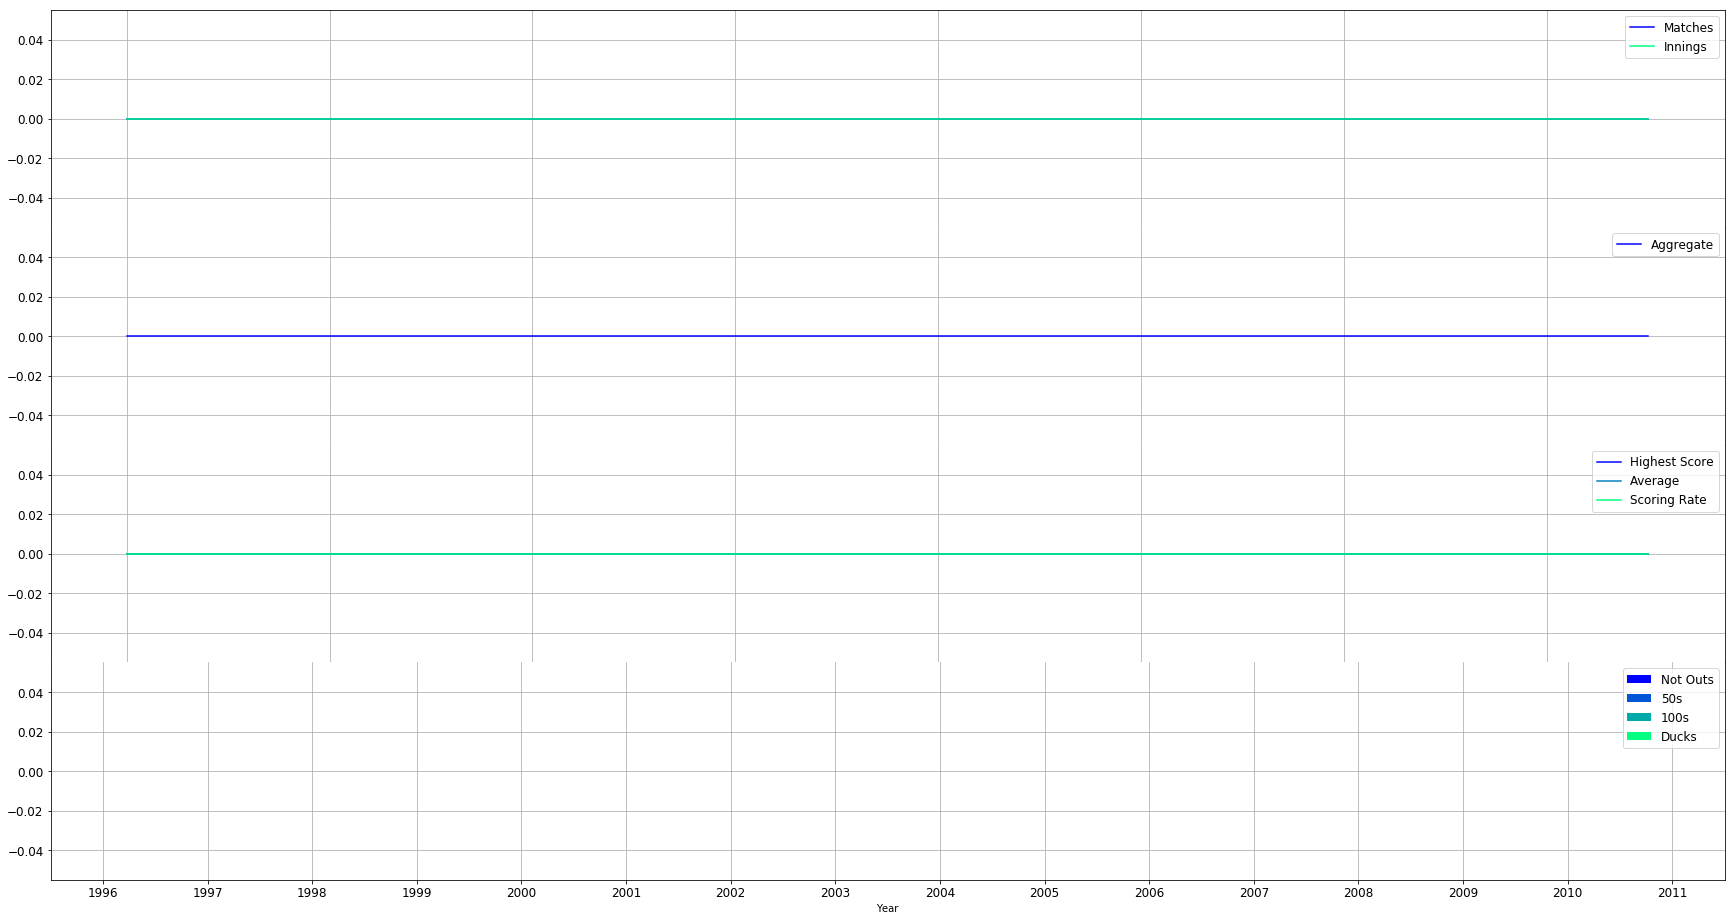

In [18]:
fig, ax = plt.subplots(figsize=(30, 16), nrows=4, ncols=1, frameon=False)
fig.subplots_adjust(hspace=0)
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[3].spines['top'].set_visible(False)

_[['Year', 'Matches', 'Innings']].plot.line(x='Year', ax=ax[0], grid=True, fontsize=12, cmap='winter')
_[['Year', 'Aggregate']].plot.line(x='Year', ax=ax[1], sharex=ax[0], grid=True, fontsize=12, cmap='winter')
_[['Year', 'Highest Score', 'Average', 'Scoring Rate']].plot.line(x='Year', ax=ax[2], sharex=ax[0], grid=True, fontsize=12, cmap='winter')
_[['Year', 'Not Outs', '50s', '100s', 'Ducks']].plot.bar(x='Year', ax=ax[3], sharex=ax[0], grid=True, fontsize=12, cmap='winter')

for i in range(4):
    ax[i].legend(loc=1, prop={'size': 12})

plt.xticks(rotation=0)
plt.savefig('../data/ODI-YearWise.png')

**FAVOURITE VENUES**

In [19]:
data['Runs_'] = data['Runs'].apply(runs_balls_clean)

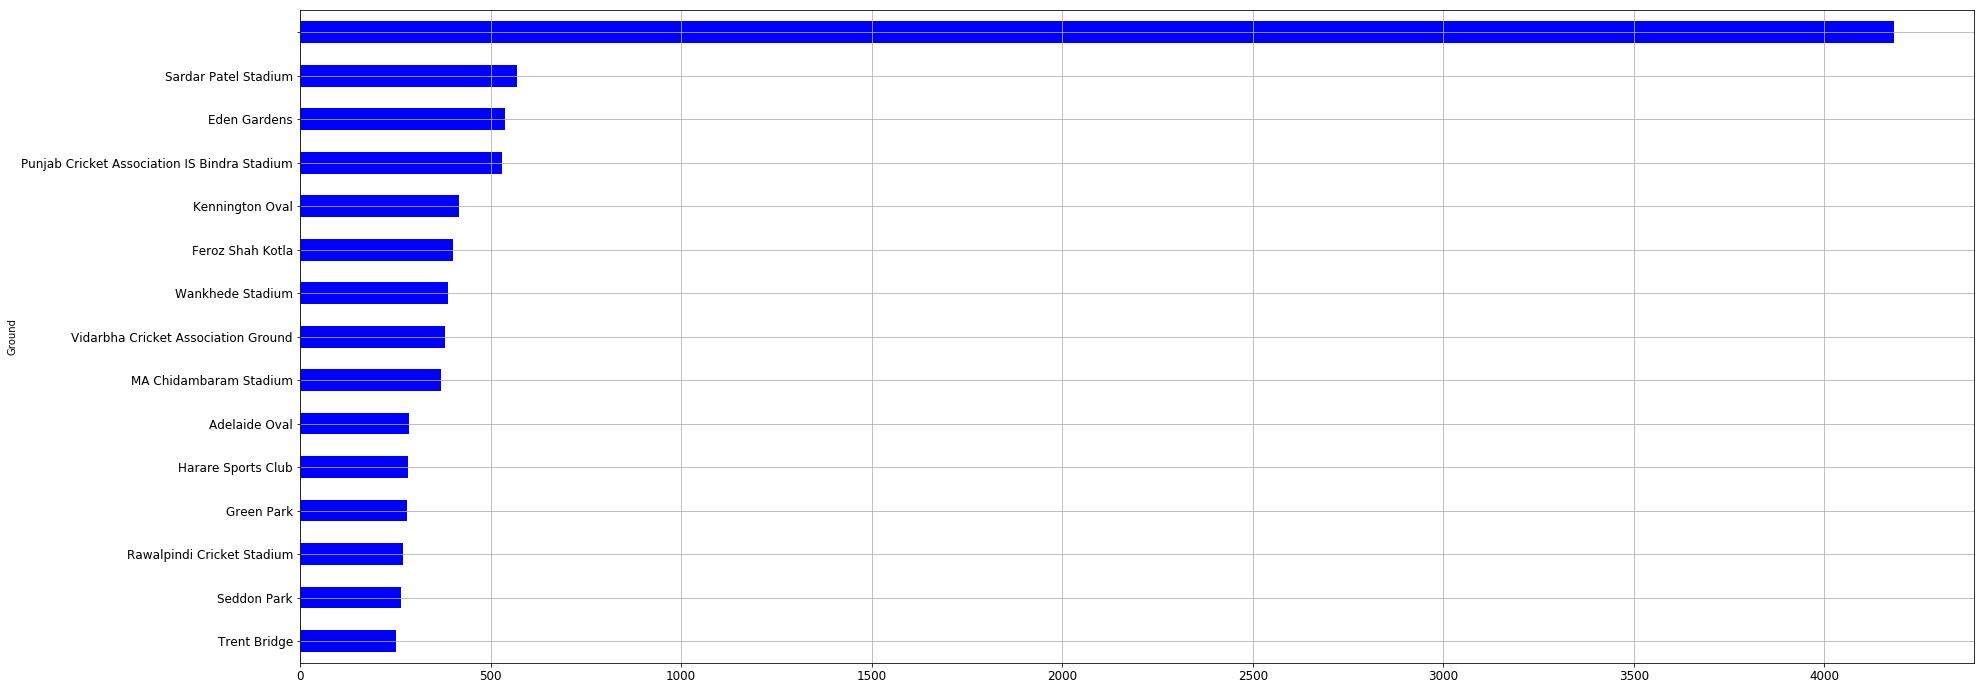

In [20]:
data.groupby('Ground')['Runs_'].sum().sort_values().tail(15).plot.barh(figsize=(30,12), grid=True, fontsize=12,
                                                                                     cmap='winter')
plt.savefig('../data/ODI-Grounds.png')